In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
def whoami()
    print("SANJAY R")
    print("24BAD407")

**SCENARIO 1**

Loading the dataset

In [ ]:
whoami()
df=pd.read_csv("/kaggle/input/students-performance-in-exams/StudentsPerformance.csv")
print(df.head())

creating target variable

In [4]:
df["final_score"] = (
    df["math score"] +
    df["reading score"] +
    df["writing score"]
) / 3

In [ ]:
Simulate missing features

In [5]:
np.random.seed(42)

df["study_hours"] = np.random.randint(1, 8, size=len(df))           
df["attendance"] = np.random.randint(60, 100, size=len(df))        
df["sleep_hours"] = np.random.randint(4, 9, size=len(df))         

Feature selection

In [6]:
X = df.drop(columns=[
    "math score",
    "reading score",
    "writing score",
    "final_score"
])

y = df["final_score"]


Identify feature type

In [7]:
categorical_features = X.select_dtypes(include="object").columns
numerical_features = X.select_dtypes(exclude="object").columns

Pre-processing pipeline

In [8]:
preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numerical_features),
        ("cat", OneHotEncoder(drop="first"), categorical_features)
    ]
)

Train test split

In [9]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [ ]:
Train multilinear reg-model

In [10]:
model = Pipeline(steps=[
    ("preprocessing", preprocessor),
    ("regressor", LinearRegression())
])

model.fit(X_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  Index(['study_hours', 'attendance', 'sleep_hours'], dtype='object')),
                                                 ('cat',
                                                  OneHotEncoder(drop='first'),
                                                  Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course'],
      dtype='object'))])),
                ('regressor', LinearRegression())])

prediction

In [11]:
y_pred = model.predict(X_test)

Model evaluation

In [12]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("MSE :", mse)
print("RMSE:", rmse)
print("R²  :", r2)

MSE : 181.8174556875542
RMSE: 13.483970323593649
R²  : 0.15183856085975078


Regression coefficients

In [13]:
feature_names = (
    numerical_features.tolist() +
    model.named_steps["preprocessing"]
         .transformers_[1][1]
         .get_feature_names_out(categorical_features).tolist()
)

coefficients = model.named_steps["regressor"].coef_

coef_df = pd.DataFrame({
    "Feature": feature_names,
    "Coefficient": coefficients
}).sort_values(by="Coefficient", ascending=False)

coef_df.head(10)


,Feature,Coefficient
13,lunch_standard,9.210343
7,race/ethnicity_group E,6.147183
6,race/ethnicity_group D,3.851054
8,parental level of education_bachelor's degree,3.480108
10,parental level of education_master's degree,1.920988
5,race/ethnicity_group C,1.047609
0,study_hours,-0.061857
4,race/ethnicity_group B,-0.100344
2,sleep_hours,-0.210613
1,attendance,-0.738503


optimization ridge regression

In [14]:
ridge = Pipeline(steps=[
    ("preprocessing", preprocessor),
    ("regressor", Ridge(alpha=1.0))
])

ridge.fit(X_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  Index(['study_hours', 'attendance', 'sleep_hours'], dtype='object')),
                                                 ('cat',
                                                  OneHotEncoder(drop='first'),
                                                  Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course'],
      dtype='object'))])),
                ('regressor', Ridge())])

optimization lasso regression

In [15]:
lasso = Pipeline(steps=[
    ("preprocessing", preprocessor),
    ("regressor", Lasso(alpha=0.01))
])

lasso.fit(X_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  Index(['study_hours', 'attendance', 'sleep_hours'], dtype='object')),
                                                 ('cat',
                                                  OneHotEncoder(drop='first'),
                                                  Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course'],
      dtype='object'))])),
                ('regressor', Lasso(alpha=0.01))])

VISUALIZATION

Predicted vs actual

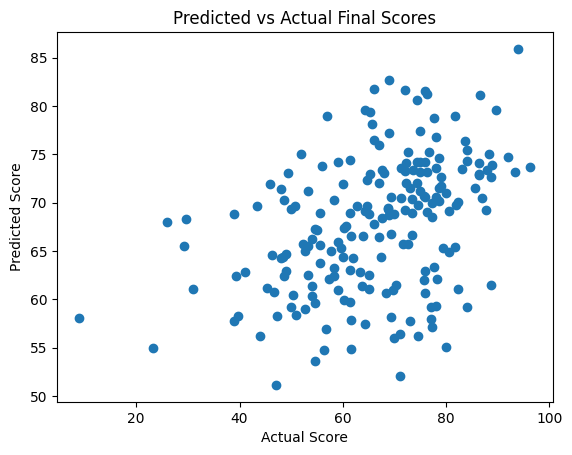

In [16]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Score")
plt.ylabel("Predicted Score")
plt.title("Predicted vs Actual Final Scores")
plt.show()

oefficient magnitude

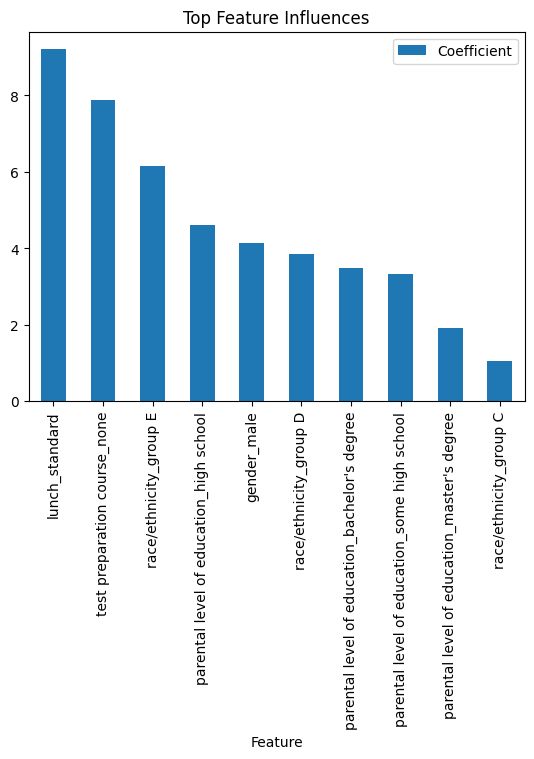

In [17]:
coef_df.set_index("Feature").abs().sort_values(
    by="Coefficient", ascending=False
).head(10).plot(kind="bar")

plt.title("Top Feature Influences")
plt.show()

Residual distribution

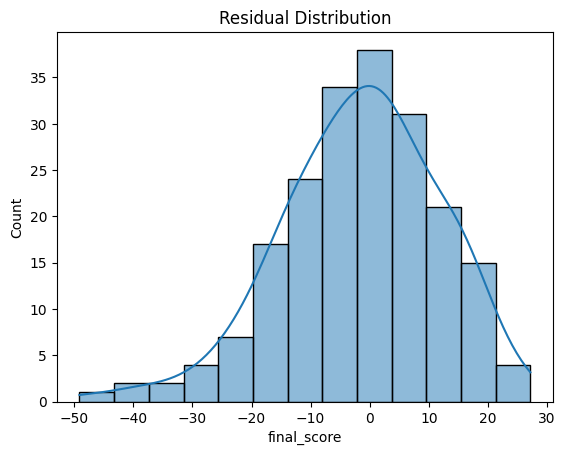

In [18]:
residuals = y_test - y_pred
sns.histplot(residuals, kde=True)
plt.title("Residual Distribution")
plt.show()

**SACENARIO 2**

In [19]:
df = pd.read_csv("/kaggle/input/autompg-dataset/auto-mpg.csv")
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


converting horse power to numerical value

In [20]:
df["horsepower"] = df["horsepower"].replace("?", np.nan)
df["horsepower"] = df["horsepower"].astype(float)

In [21]:
df["horsepower"].fillna(df["horsepower"].mean(), inplace=True)

/tmp/ipykernel_55/666407550.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["horsepower"].fillna(df["horsepower"].mean(), inplace=True)


Target selecting

In [22]:
X = df[["horsepower"]]
y = df["mpg"]

In [23]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

Feature scaling

In [24]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [25]:
def polynomial_model(degree):
    poly = PolynomialFeatures(degree=degree)
    
    X_train_poly = poly.fit_transform(X_train_scaled)
    X_test_poly = poly.transform(X_test_scaled)
    
    model = LinearRegression()
    model.fit(X_train_poly, y_train)
    
    y_pred = model.predict(X_test_poly)
    
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    
    return model, poly, mse, rmse, r2


In [26]:
results = {}

for d in [2, 3, 4]:
    model, poly, mse, rmse, r2 = polynomial_model(d)
    results[d] = {"MSE": mse, "RMSE": rmse, "R2": r2}

results_df = pd.DataFrame(results).T
results_df

,MSE,RMSE,R2
2,13.760855,3.709563,0.744062
3,13.813374,3.716635,0.743086
4,14.118024,3.757396,0.737419


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


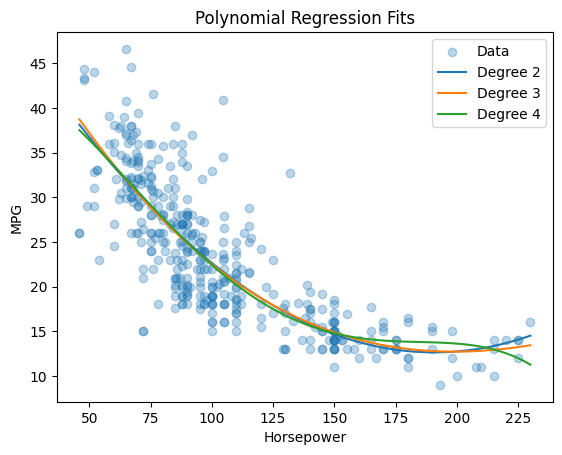

In [27]:
X_range = np.linspace(X.min(), X.max(), 300).reshape(-1, 1)
X_range_scaled = scaler.transform(X_range)

plt.scatter(X, y, alpha=0.3, label="Data")

for d in [2, 3, 4]:
    poly = PolynomialFeatures(d)
    X_poly = poly.fit_transform(X_train_scaled)
    model = LinearRegression()
    model.fit(X_poly, y_train)
    
    y_curve = model.predict(poly.transform(X_range_scaled))
    plt.plot(X_range, y_curve, label=f"Degree {d}")

plt.xlabel("Horsepower")
plt.ylabel("MPG")
plt.title("Polynomial Regression Fits")
plt.legend()
plt.show()


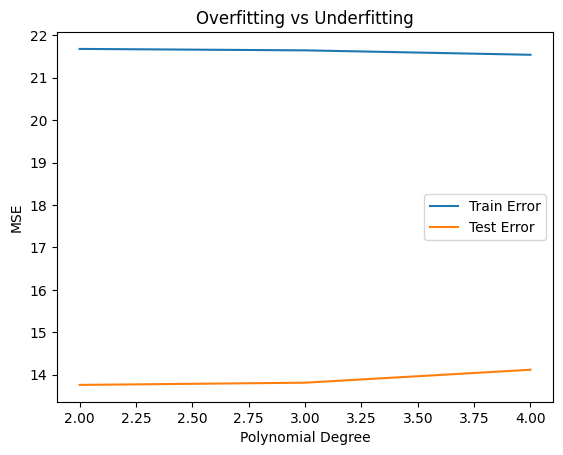

In [28]:
train_errors = []
test_errors = []

for d in [2, 3, 4]:
    poly = PolynomialFeatures(d)
    X_train_poly = poly.fit_transform(X_train_scaled)
    X_test_poly = poly.transform(X_test_scaled)
    
    model = LinearRegression()
    model.fit(X_train_poly, y_train)
    
    train_errors.append(mean_squared_error(
        y_train, model.predict(X_train_poly)))
    
    test_errors.append(mean_squared_error(
        y_test, model.predict(X_test_poly)))

plt.plot([2,3,4], train_errors, label="Train Error")
plt.plot([2,3,4], test_errors, label="Test Error")
plt.xlabel("Polynomial Degree")
plt.ylabel("MSE")
plt.title("Overfitting vs Underfitting")
plt.legend()
plt.show()


In [29]:
poly = PolynomialFeatures(degree=4)

X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

ridge = Ridge(alpha=10)
ridge.fit(X_train_poly, y_train)

y_pred_ridge = ridge.predict(X_test_poly)

print("Ridge RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_ridge)))
print("Ridge R2:", r2_score(y_test, y_pred_ridge))


Ridge RMSE: 3.703079102888891
Ridge R2: 0.744956261083338
